<a href="https://colab.research.google.com/github/Pravinoraon/capstone/blob/main/Notebook%203%3A%20Model%20Testing%20%26%20Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load trained model
model_path = "/content/drive/MyDrive/bell_pepper_data/bell_pepper_hybrid_resnet_efficientnet.h5"
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [4]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
val_dir = "/content/drive/MyDrive/bell_pepper_data/val"

In [5]:
# Load validation data
val_datagen = ImageDataGenerator(rescale=1.0/255)
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 496 images belonging to 2 classes.


In [6]:
# Evaluate model
loss, accuracy = model.evaluate(val_data)
print(f"📉 Validation Loss: {loss:.4f}")
print(f"✅ Validation Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 256s 16s/step - accuracy: 0.6373 - loss: 0.6196
📉 Validation Loss: 0.5573
✅ Validation Accuracy: 0.7319


In [7]:
# Predict on validation data
y_pred_probs = model.predict(val_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 718ms/step

📊 Classification Report:
              precision    recall  f1-score   support

    Diseased       0.71      0.57      0.63       200
     Healthy       0.74      0.84      0.79       296

    accuracy                           0.73       496
   macro avg       0.73      0.71      0.71       496
weighted avg       0.73      0.73      0.73       496



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


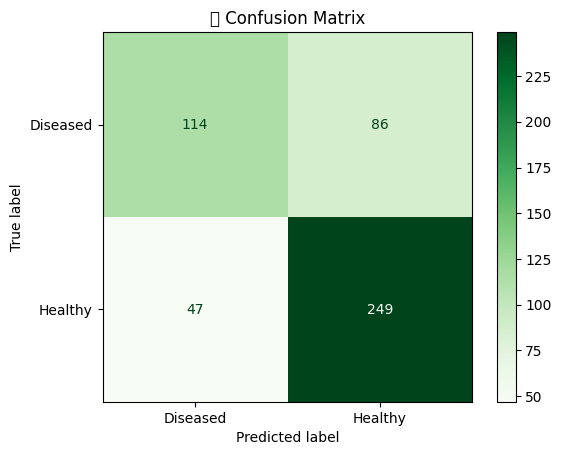


📋 Confusion Matrix Table:
|                 |   Predicted Diseased |   Predicted Healthy |
|:----------------|---------------------:|--------------------:|
| Actual Diseased |                  114 |                  86 |
| Actual Healthy  |                   47 |                 249 |


In [8]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Greens")
plt.title("🧮 Confusion Matrix")
plt.show()

# 🧾 Confusion Matrix Table
df_conf = pd.DataFrame(cm, index=[f"Actual {label}" for label in class_labels],
                       columns=[f"Predicted {label}" for label in class_labels])
print("\n📋 Confusion Matrix Table:")
print(df_conf.to_markdown())

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


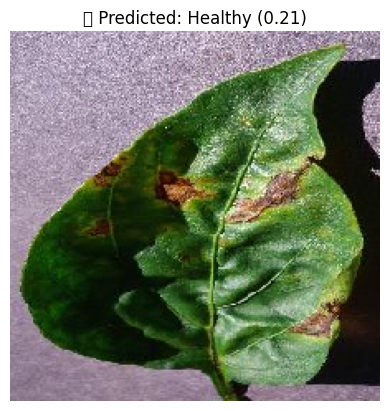

In [9]:
# Single Image Prediction
def predict_image(image_path, model):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    category = "Diseased" if prediction > 0.5 else "Healthy"
    plt.imshow(img)
    plt.title(f"🖼️ Predicted: {category} ({prediction:.2f})")
    plt.axis('off')
    plt.show()

# Test on one image
diseased_img = os.listdir(os.path.join(val_dir, "Diseased"))[0]
test_image_path = os.path.join(val_dir, "Diseased", diseased_img)
predict_image(test_image_path, model)